# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 3</center>
### <center>Ensambles: KNN</center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo
* Nicolas Tonizzo

# Imports y preparacion del dataset

In [27]:
#Datos
import numpy as np
import pandas as pd

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

Declaramos el target y los features del dataframe que vamos a utilizar para predecir.

In [28]:
df_original = pd.read_csv("./dataset/hotels_train_procesado.csv")
df = df_original.copy()

In [29]:
target = "is_canceled"

attrs = [
    "hotel_encoding",
    
    "lead_time",
    "reservo_el_mismo_dia",
    "adr",

    "stays_in_weekend_nights",
    "stays_in_week_nights",

    "tiene_hijos",
    "adults",
    # "children",
    # "babies",

    # Fechas
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "arrival_date_year",

    "es_extranjero",
    "es_portugues",
    "es_ingles",
    "es_frances",
    "es_espanol",
    "es_aleman",

    "reserved_room_was_assigned",

    "is_repeated_guest",
    "previous_cancellations", "previous_bookings_not_canceled",
    #"total_reservas_previas"
    "total_of_special_requests",
    "booking_changes",

    #'meal',
    "solo_desayuna_en_el_hotel",
    "pidio_todas_comidas",

    # 'required_car_parking_spaces',
    "required_a_car_parking_space",

    "reservo_sin_reembolso",
    "reservo_sin_depositar",
    "reservo_online",
    "reservo_en_grupo",
    "reservo_sin_compania",
    "reservo_sin_agente",
    "reservo_sin_paquete",
    
    # "days_in_waiting_list",
    "tuvo_dias_de_espera",
    
    "agent9",
    "agent240",
    "agent1",
    "agent14",
    "agent6",
]

**Dividimos el dataset en entrenamiento y validacion**, para poder validar que no estamos overfitteando al dataset de entrenamiento, y que el modelo predice bien a registros no vistos anteriormente. Vamos a utilizar mitad de el dataset para validacion y mitad del dataset para entrenamiento ya que al momento de realizar pruebas estas tardan una buena cantidad de tiempo el cual se puede reducir utilizando una menor cantidad de datos para entrenamiento aunque reduciendo su precision.

In [30]:
x = df[attrs].values
y = df[target].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)

Creacion de modelo con sus parámetros por defecto:

In [31]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Pruebo la precision con los parametros por defecto

In [32]:
#Entrenar el modelo
KNN_Classifier.fit(x_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(x_test)

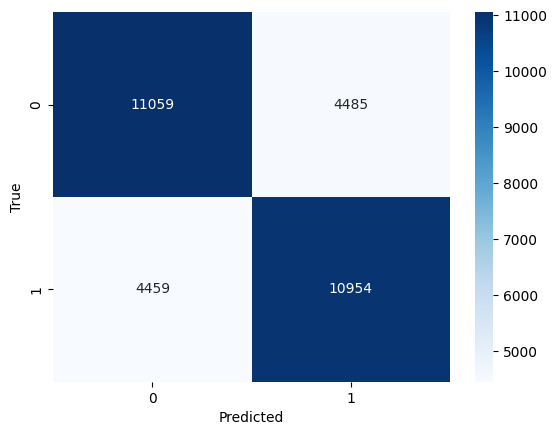

In [33]:
#Cantidad de aciertos
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Busco como influye la cantidad de vecinos a consultar a la cantidad de aciertos

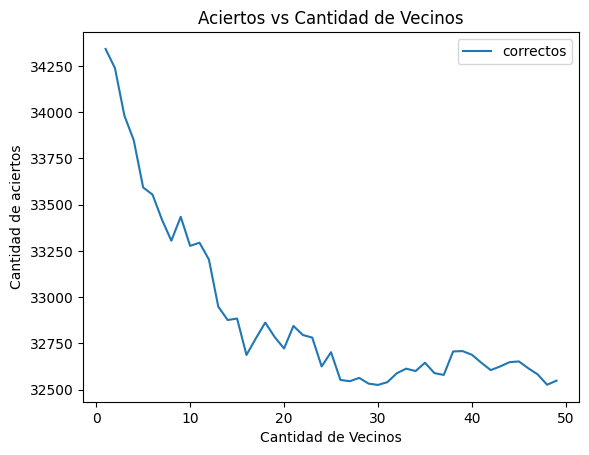

In [26]:
metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(1, 50) # vecinos

for n in k_range:

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    metrics.append((n, (y_test == y_pred).sum()))
    
df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos', 
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

La cantidad de aciertos disminuye si se incrementan por demas la cantidad de vecinos

KNN posee parametros que no son compatibles entre si, busco cuales si lo son

In [34]:
#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



Busco optimizar los parametros utilizando Grid Search y Cross Validation, para no incrementar demasiado el tiempo de busqueda de los parametros utilizamos 4 folds

In [38]:
kfoldcv = StratifiedKFold(n_splits=4)

KNN_Classifier = KNeighborsClassifier()

params_grid = {  'algorithm': ["ball_tree", "kd_tree","brute"],
                 'metric': ["minkowski","euclidean","manhattan"],
                 'n_neighbors': list(range(1,20)),
                 'weights': ["uniform", "distance"] }

model = GridSearchCV(
    estimator=KNN_Classifier,
    param_grid=params_grid,
    scoring=make_scorer(f1_score),
    cv=kfoldcv,
    n_jobs = -1
)

In [39]:
model.fit(x_train, y_train)
print("Los mejores parametros encontrados son: ", model.best_params_)
print("con un f1 score: ", model.best_score_)

Los mejores parametros encontrados son:  {'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
con un f1 score:  0.7639048499103442


In [ ]:
Obtengo el KNN con los mejores parametros y obtengo sus resultados con los datasets de test

In [43]:
mejor_knn=model.best_estimator_

#Predicción con mejor estimador
y_pred=mejor_knn.predict(x_test)

Text(50.722222222222214, 0.5, 'True')

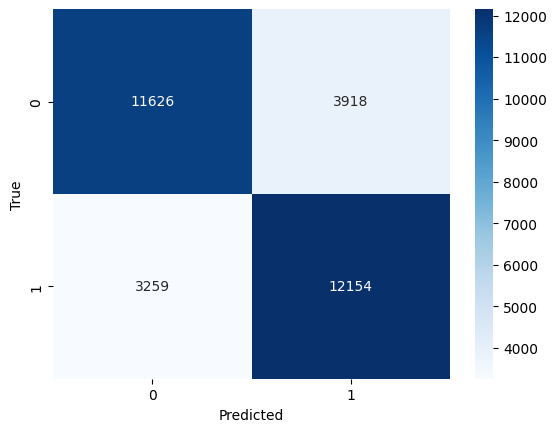

In [42]:
#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Creacion de submit

In [46]:
df_test = pd.read_csv("./dataset/hotels_test_procesado.csv")
assert(len(df_test)==26535)

prediccion = mejor_knn.predict(df_test[attrs].values)
assert(len(prediccion)==26535)

submit = pd.DataFrame(
    {"is_canceled": prediccion},
    index=df_test["id"],
)
assert(len(submit)==26535)

submit.to_csv("../dataset/submit.csv")

# Guardando el modelo con pickle

In [54]:
import pickle

with open('./dataset/knn.pickle', 'wb') as file:
    pickle.dump(mejor_knn, file)